## Sentiment Analysis from Scratch: Comprehensive Study of Twitter Dataset

### Notebook 1:- Data Visualization and Cleaning

#### Importing Libraries 

In [4]:
# Downloading new libraries
!pip install emot
!pip install unidecode
!pip install Unidecode

In [3]:
# importing necessary libraries and packages

# Libraries to handle os related operations
import os 
import time
import warnings
warnings.filterwarnings('ignore')

#Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# libraries to work wtih text processing
import re
import emot
from emot.emo_unicode import EMOTICONS_EMO
from string import punctuation
import html
import unidecode

# NLP related libraries and packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer


In [5]:
# Download resources for nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Piyush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Piyush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# new libraries that needs to be imported 


#### Data Loading

Following data has been downloaded from [Kaggle](https://www.kaggle.com/datasets/kazanova/sentiment140/data)

In [7]:
# import dataset from kaggle
dataset_tweets = pd.read_csv("./dataset/training.1600000.processed.noemoticon.csv",encoding = 'ISO-8859-1',
                             names=['target', 'ids', 'date', 'flag','user', 'text'])

#Viewing 20 samples of the dataset_tweets
dataset_tweets.sample(10)

,target,ids,date,flag,user,text
11823,0,1551542948,Sat Apr 18 09:20:03 PDT 2009,NO_QUERY,John77,is at home nursing his cold... My friend call...
656914,0,2240769726,Fri Jun 19 10:08:28 PDT 2009,NO_QUERY,NeilAdam,@dawnhallybone really sorry to hear that
124276,0,1834079298,Mon May 18 01:32:55 PDT 2009,NO_QUERY,lanajabar,math was effin hard!! i hav a bad feeling abo...
169226,0,1962463620,Fri May 29 11:05:08 PDT 2009,NO_QUERY,maydaycaptain,@tsa4string Have fun at the show tonight... wi...
523470,0,2193143932,Tue Jun 16 08:03:22 PDT 2009,NO_QUERY,kye_loves_spurs,"just paid me phone bill, the buggers turned me..."
631729,0,2232425895,Thu Jun 18 19:53:48 PDT 2009,NO_QUERY,BlessedBy3Kids,Thinks my cell phone just died!!! Not battery ...
1250357,4,1996276647,Mon Jun 01 14:49:05 PDT 2009,NO_QUERY,hezitros,graaaa... i have dried super glue all over my ...
668660,0,2246012048,Fri Jun 19 16:58:07 PDT 2009,NO_QUERY,yahoomonk,The next city is Chicago; I wish I could be th...
1500365,4,2071137877,Sun Jun 07 18:53:55 PDT 2009,NO_QUERY,justkappa,Of course I'm listening to the wifey.. -- Kie...
1134795,4,1976394646,Sat May 30 17:14:00 PDT 2009,NO_QUERY,DancNQu33n,@ladygee22208 hahaha u funny my always been to...


In [9]:
# checking for null values in the dataset_tweets
dataset_tweets.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [10]:
# get the complete meta data info about the dataset_tweets
dataset_tweets.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 556.1 MB


Data regarding the tweets currently have following 6 columns (target, ids, date, flag, user, text) with no null values present. In total we have 1600000 entries or different tweets observation in the dataset for the analysis.

#### Dropping Unnecessary columns/ Data Cleaning

Currently we only need tweets in text column and target column to train and analyze the dataset. Hence, we will be removing other columns from the dataset_tweets. 

In [11]:
# remove unnecessary columns
dataset_tweets.drop(labels =['ids', 'date', 'flag', 'user'], axis = 1, inplace = True)
dataset_tweets.head(5)

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [12]:
# Checking for unique values in target column
print(dataset_tweets.target.unique())
print(dataset_tweets.target.nunique())

[0 4]
2


We only have 2 unique values in target column that is 0-> Negative and 4-> Positive. We will replace 4 with 1 for ease of understanding and working with the dataset.

In [13]:
dataset_tweets['target'] = dataset_tweets['target'].replace(4,1)
print(dataset_tweets.target.unique())

[0 1]


In [14]:
# Viewing target == 0 i.e Negative Tweets
dataset_tweets[dataset_tweets['target']==0].text.sample(5)

722070    - Still can't believe he is gone, a person who...
417947    So bummed  got called in to work cause i forgo...
403078    So itchy....peeling  tan vanishing...all that ...
67208                                     need. to. study. 
774842    @Tire_Man  guy at Belle said there was nothing...
Name: text, dtype: object

In [15]:
# Similarly viewing target ==1 i.e Positive tweets
dataset_tweets[dataset_tweets['target']==1].text.sample(5)

1372103    @heisedwin Hey you! nothing much, how've you b...
1115594    Been to town today with Alex, bought a new rin...
1352894    Thanks @nickyyates of @charitywater for the fo...
967181     @JasonBradbury What's your PS3 ID I'll give yo...
1049026                                   Its all sunny now 
Name: text, dtype: object

In [16]:
# Count the occurance of Negative and Positive tweets in dataset_tweets
dataset_tweets.target.value_counts()

0    800000
1    800000
Name: target, dtype: int64

We have equal occurance of each Positive and Negative Tweets in the dataset.

[]

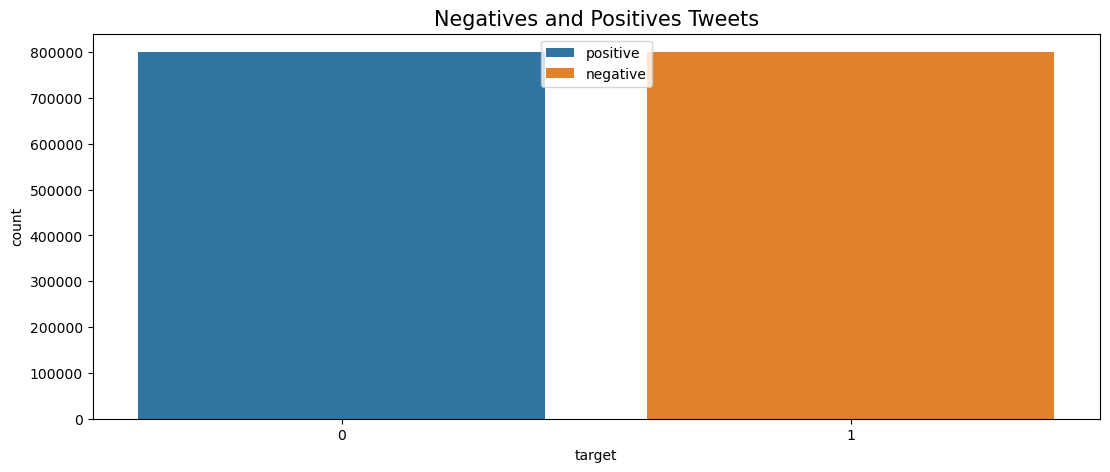

In [21]:
# work on this visualization 
###### Pending

plt.figure(figsize = (13,5))
sns.countplot(x='target', data = dataset_tweets, label = ['positive','negative'])
plt.xticks()
plt.legend(loc = 'upper center')
plt.title("Negatives and Positives Tweets",fontsize =15)
plt.plot()

### Preprocessing the data 

In [22]:
def remove_username(text):
    text = re.sub(r"@\w+","",text)
    return text

def remove_links(text):
    text = re.sub(r"\shttp\S+","",text)
    return text

def convert_htmlentities(text):
    text = html.unescape(text)
    return text

def convert_emoticon(text):
    text = text.split()
    temp = []
    for i in text:
        if i in  EMOTICONS_EMO.keys():
            i =  EMOTICONS_EMO[i]
        temp.append(i)
    return  " ".join(temp)

def remove_unidecode_words(text):
    words = text.split()
    filtered_words = [word for word in words if unidecode.unidecode(word) == word]
    return ' '.join(filtered_words)

def remove_nonalpha(text):
    text = text.split()
    temp_text = []
    for word in text:
        if word.isalpha():
            temp_text.append(word)
    return " ".join(temp_text)


def text_processing(text):
    text = remove_username(text)
    text = remove_links(text)
    text = convert_htmlentities(text)
    text = convert_emoticon(text)
    text = remove_unidecode_words(text)
    return text

In [24]:
# import stopwards to remove stopwords from tweets
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# initiate stopwords with 'english'
stop_words = stopwords.words('english')

# initiate a punctuation list to store all the punctuations
punct_list = []

for i in punctuation:
    punct_list.append(i)

# combine stopwords and punctuation to remove them at once
stopwords_2 = stop_words+punct_list

# Initiate WordPunctTokenizer
word_tokenizer = WordPunctTokenizer()

# initiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [25]:
# Start text preprocessing to get clean text
start_time = time.time()
new_tweets = []
for sent in dataset_tweets['text']:
    sent = text_processing(sent)
    sent = remove_nonalpha(sent)
    sent = word_tokenizer.tokenize(sent)
    words = [lemmatizer.lemmatize(word.lower()) for word in sent if word not in stopwords_2]
    sent = " ".join(words)
    new_tweets.append(sent)
print(f'Data Preprocessing completed. Elapsed time is {time.time()-start_time} secs')

Data Preprocessing completed. Elapsed time is 455.63364267349243 secs


In [26]:
# Save the processed tweets to the dataset
dataset_tweets['text'] = new_tweets
dataset_tweets.smaple(10)

In [ ]:
# saving the processed dataset 
dataset_tweets.to_csv("./Dataset/training_processed_data_1.csv", index = False, sep= ',')

# Experiments

In [90]:
def remove_username(text):
    text = re.sub(r"@\w+","",text)
    text = re.sub(r"&\w+","",text)
    text = re.sub(r"\shttp\S+","",text)
    return text

In [91]:
# Tokenization experiment
text_1 = dataset_tweets['text'][0]
print(text_1)

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [92]:
print(remove_username(text_1))

 - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
